In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [4]:
df= pd.read_csv("C:\\Users\\ahate\\OneDrive\\Desktop\\Amazon Sale Report.csv",low_memory=False)
df.head()


,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


In [8]:
print("shape",df.shape)

shape (128975, 24)


In [9]:
print("columns",df.columns.tolist())

columns ['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ', 'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN', 'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids', 'B2B', 'fulfilled-by', 'Unnamed: 22']


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            121180 non-null  object 
 15  Amount              121180 non-nul

In [13]:
df.describe(include="all").T.head(20)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
index,128975.0,NaN,NaN,NaN,64487.0,37232.019822,0.0,32243.5,64487.0,96730.5,128974.0
Order ID,128975,120378,171-5057375-2831560,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Date,128975,91,05-03-2022,2085,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Status,128975,13,Shipped,77804,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fulfilment,128975,2,Amazon,89698,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sales Channel,128975,2,Amazon.in,128851,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ship-service-level,128975,2,Expedited,88615,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Style,128975,1377,JNE3797,4224,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SKU,128975,7195,JNE3797-KR-L,773,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Category,128975,9,Set,50284,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
def simplify_status (x):
    x=str(x).lower()
    if "ship" in x:
        return "Shipped"
    elif "cancel" in x:
        return "Cancelled"
    elif "return" in x:
        return "Returned"
    else:
        return "Other"
df["StatusSimple"]=df["Status"].map(simplify_status)
print(df["StatusSimple"].value_counts())

    
    

Shipped      109704
Cancelled     18332
Other           939
Name: StatusSimple, dtype: int64


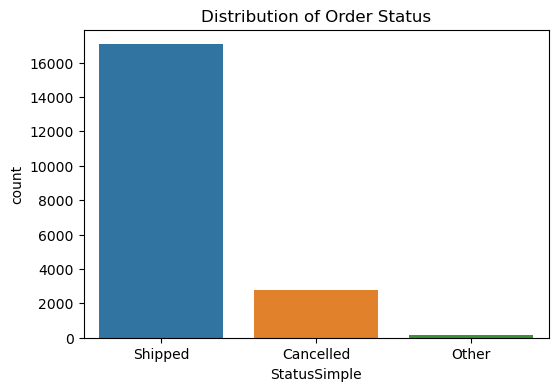

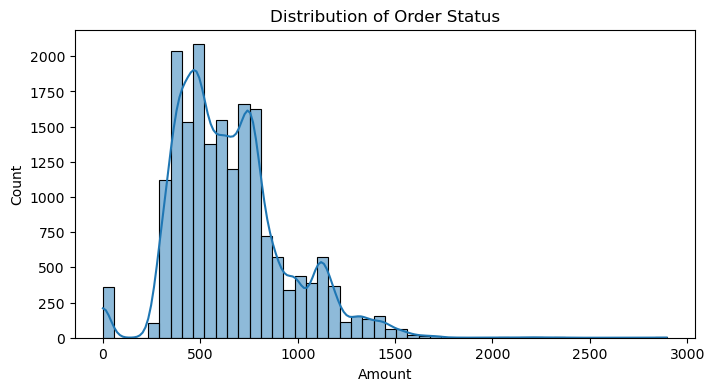

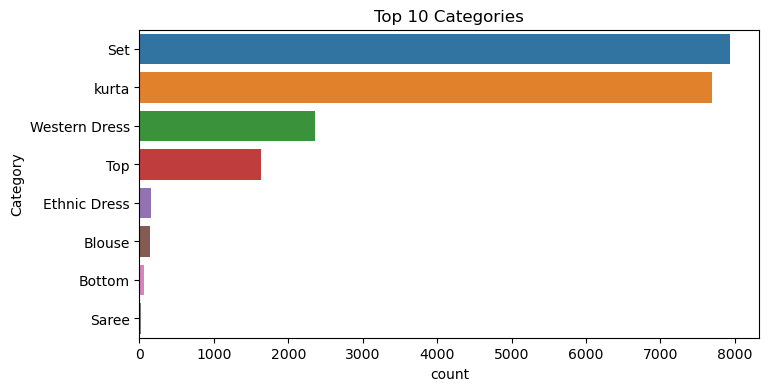

In [44]:
plt.figure(figsize=(6,4))
sns.countplot(x="StatusSimple",data=df,order=df["StatusSimple"].value_counts().index)
plt.title("Distribution of Order Status")
plt.show()

plt.figure(figsize=(8,4))
sns.histplot(df["Amount"], bins=50,kde=True)
plt.title("Distribution of Order Status")
plt.show()

plt.figure(figsize=(8,4))
sns.countplot(y="Category", data=df,order=df["Category"].value_counts().head(10).index)
plt.title("Top 10 Categories")
plt.show()

In [30]:
Features=[
    "Fulfilment",
    "Sales Channel ",
    "Category",
    "Qty",
    "Amount",
    "Size",
    "ship-state",
    "ship-city",
]
x=df[Features]
y=df["StatusSimple"]
print("Target classes:",y.unique())

Target classes: ['Cancelled' 'Shipped' 'Other']


In [32]:
#train test split
if len(df) > 20000:
    df=df.sample(20000, random_state=42)
    x=df[Features]
    y=df["StatusSimple"]
X_train,X_test,y_train,y_test=train_test_split(x,y, test_size=0.2,random_state=42,stratify=y)
print("Train Size:",X_train.shape,"Test Size:",X_test.shape)

Train Size: (16000, 8) Test Size: (4000, 8)


In [36]:
numeric_features=["Qty","Amount"]
categorical_features=["Fulfilment","Sales Channel ","Category","Size","ship-state","ship-city"]
numeric_transformer=Pipeline(steps=[
      ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])
categorical_transformer=Pipeline(steps=[
    ("imputer",SimpleImputer(strategy="constant",fill_value="missing")),
    ("onehot",OneHotEncoder(handle_unknown="ignore"))
])

preprocessor=ColumnTransformer(
    transformers=[
        ("num",numeric_transformer,numeric_features),
        ("cat",categorical_transformer,categorical_features)
    ]
)
clf = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(n_estimators=200, random_state=42, class_weight="balanced"))
])

In [39]:
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print("Accuracy:",accuracy_score(y_test,y_pred))
print("\nClassification Report:\n",classification_report(y_test,y_pred))

Accuracy: 0.9315

Classification Report:
               precision    recall  f1-score   support

   Cancelled       0.85      0.70      0.76       559
       Other       0.00      0.00      0.00        30
     Shipped       0.94      0.98      0.96      3411

    accuracy                           0.93      4000
   macro avg       0.60      0.56      0.58      4000
weighted avg       0.92      0.93      0.93      4000



In [40]:
#predict on sample

sample = pd.DataFrame([{
    "Fulfilment": "Amazon",
    "Sales Channel ": "Amazon.in",
    "Category": "Apparel",
    "Qty": 1,
    "Amount": 499.0,
    "Size": "M",
    "ship-state": "MAHARASHTRA",
    "ship-city": "MUMBAI"
}])

print("Sample prediction:", clf.predict(sample)[0])

Sample prediction: Shipped


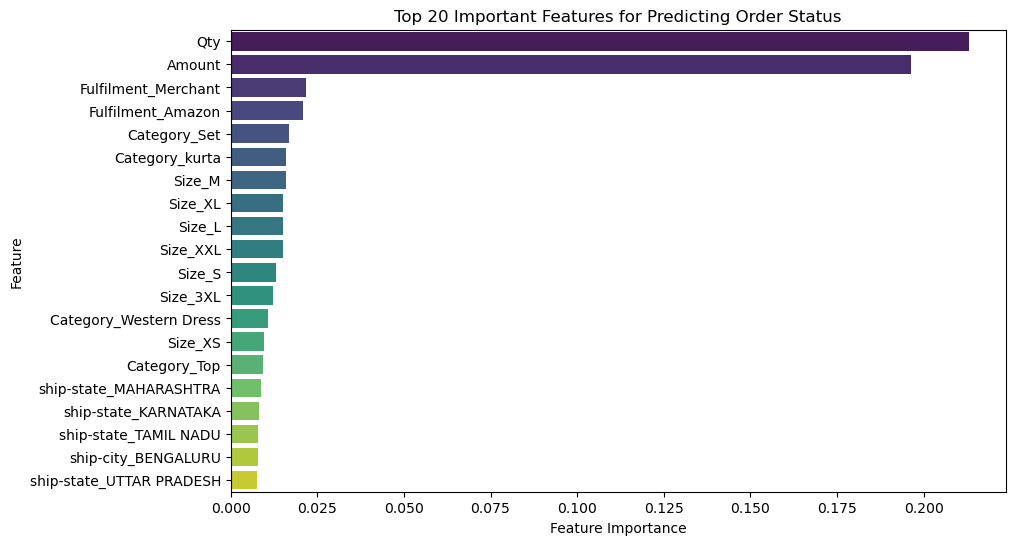

In [41]:
#features importance on Visulation

rf_model = clf.named_steps["classifier"]
onehot_features = list(
    clf.named_steps["preprocessor"]
       .named_transformers_["cat"]
       .named_steps["onehot"]
       .get_feature_names_out(categorical_features)
)

all_features = numeric_features + onehot_features
importances = rf_model.feature_importances_
feature_importances = pd.Series(importances, index=all_features).sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=feature_importances.head(20), y=feature_importances.head(20).index, palette="viridis")
plt.title("Top 20 Important Features for Predicting Order Status")
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.show()